In [1]:
# load packages
import os
import glob
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import backend
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm
import imageio
import cv2
import multiprocessing
from utils import find_closest_element, Fy

In [2]:
# path of model checkpoints
checkpoint_path = '../../../data/models/20201027_filtered_gaussian_resampled/'
shard_path = '../../../data/commaai/training_files_filtered/tfrecords/'
shard_files = glob.glob(os.path.join(shard_path, "*.tfrecords")) 
extracted_coefficients_directory_beta = '../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/beta/'
extracted_coefficients_directory_Bzeta = '../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/'

In [3]:
# define model and load weights from training
Input = tf.keras.layers.Input(shape=(66, 200, 3,), name='image')
x = Conv2D(24, kernel_size=(5, 5), activation='relu', strides=(2, 2))(Input)
x = BatchNormalization()(x)
x = Conv2D(36, kernel_size=(5, 5), activation='relu', strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(48, kernel_size=(5, 5), activation='relu', strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
#x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1164)(x)
x = Dropout(0.5)(x)
x = Dense(100)(x)
x = Dropout(0.5)(x)
x = Dense(50)(x) 
x = Dropout(0.2)(x)
x = Dense(10)(x)
Output = Dense(1, name = 'output_layer')(x)

keras_model = tf.keras.models.Model(
      inputs = [Input], outputs = [Output])

# load weights
keras_model.load_weights(tf.train.latest_checkpoint(checkpoint_path)) # tf.train.latest_checkpoint(checkpoint_path)

In [90]:
im = imageio.imread(str('../../../data/commaai/train_bags_2/0/2_1079run1.png'))
img = cv2.resize(im, dsize = (291,218), interpolation = cv2.INTER_LINEAR)[76:142, 45:245,0:3].reshape(1,66,200,3)/255
    

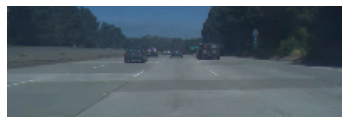

In [102]:
plt.imshow(img.reshape(66,200,3)*255/169)
plt.axis('off')
plt.savefig('activation_imgs/input_layer.png')

In [24]:
layer_outputs = [layer.output for layer in keras_model.layers]
activation_model = keras.models.Model(inputs = keras_model.input, outputs=layer_outputs)
activations = activation_model.predict(img) 

## Input layer

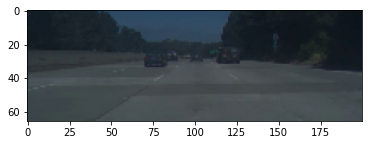

In [25]:
# input layer
plt.imshow(activations[0].reshape(66,200,3))
plt.axis('off')

## Conv1

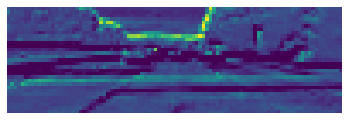

In [92]:
# first conv layer
plt.imshow(activations[1][:,:,:,11].reshape(31, 98,1))
plt.axis('off')
plt.savefig('activation_imgs/conv1_1.png')

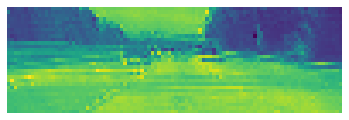

In [93]:
plt.imshow(activations[1][:,:,:,2].reshape(31, 98,1))
plt.axis('off')
plt.savefig('activation_imgs/conv1_2.png')

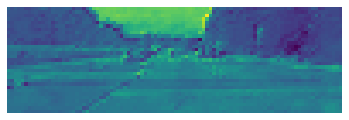

In [94]:
plt.imshow(activations[1][:,:,:,4].reshape(31, 98,1))
plt.axis('off')
plt.savefig('activation_imgs/conv1_3.png')

## Conv2

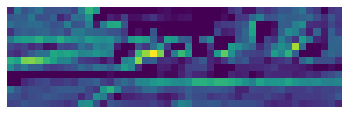

In [95]:
plt.imshow(activations[3][:,:,:,6].reshape(14, 47,1))
plt.axis('off')
plt.savefig('activation_imgs/conv2_1.png')

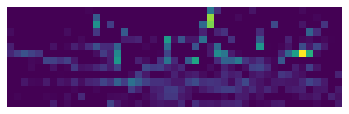

In [96]:
plt.imshow(activations[3][:,:,:,7].reshape(14, 47,1))
plt.axis('off')
plt.savefig('activation_imgs/conv2_2.png')

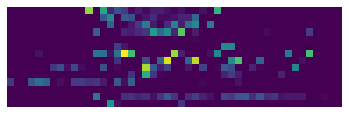

In [97]:
plt.imshow(activations[3][:,:,:,19].reshape(14, 47,1))
plt.axis('off')
plt.savefig('activation_imgs/conv2_3.png')

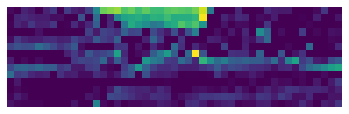

In [103]:
plt.imshow(activations[3][:,:,:,21].reshape(14, 47,1))
plt.axis('off')
plt.savefig('activation_imgs/conv2_4.png')

## Conv3

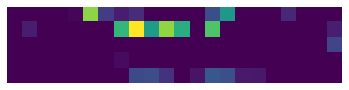

In [104]:
plt.imshow(activations[5][:,:,:,40].reshape(5, 22,1))
plt.axis('off')
plt.savefig('activation_imgs/conv3_3.png')

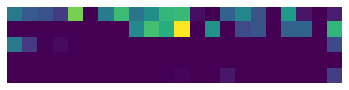

In [105]:
plt.imshow(activations[5][:,:,:,1].reshape(5, 22,1))
plt.axis('off')
plt.savefig('activation_imgs/conv3_1.png')

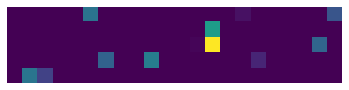

In [106]:
plt.imshow(activations[5][:,:,:,20].reshape(5, 22,1))
plt.axis('off')
plt.savefig('activation_imgs/conv3_3.png')

## Conv4

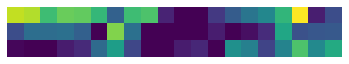

In [99]:
plt.imshow(activations[7][:,:,:,1].reshape(3, 20,1))
plt.axis('off')
plt.savefig('activation_imgs/conv4_3.png')

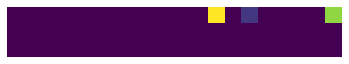

In [100]:
plt.imshow(activations[7][:,:,:,20].reshape(3, 20,1))
plt.axis('off')
plt.savefig('activation_imgs/conv4_1.png')

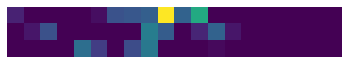

In [101]:
plt.imshow(activations[7][:,:,:,40].reshape(3, 20,1))
plt.axis('off')
plt.savefig('activation_imgs/conv4_2.png')

## Conv 5

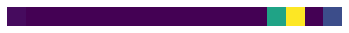

In [111]:
plt.imshow(activations[9][:,:,:,1].reshape(1, 18,1))
plt.axis('off')
plt.savefig('activation_imgs/conv5_1.png')

In [110]:
activations[9].shape

(1, 1, 18, 64)